# Download LCDB 1.1

In [ ]:
import json
import requests
from pathlib import Path
import time

with open("croissant.json", "r") as f:
    croissant = json.load(f)

main_url = croissant["url"]
session = requests.Session()

### database url
print(f"Accesing Database URL: {main_url}")
session.get(main_url, headers={"User-Agent": "Mozilla/5.0"})  # browser
time.sleep(2)  # stay 2 secs

### Load the database with different metrics from main url
for file_info in croissant.get("distribution", []):
    if file_info.get("@type") == "cr:FileObject":
        name = file_info["name"]
        url = file_info["contentUrl"]
        print(f"Downloading: {name}")
        try:
            r = session.get(url, headers={
                    "User-Agent": "Mozilla/5.0",
                    "Referer": main_url  # jump from main_url
                })
            r.raise_for_status()
            with open(Path(Path.cwd() / 'dataset') / name, "wb") as f:
                f.write(r.content)
            print(f"Download completed: {name}")
        except Exception as e:
            print(f"Download failed: {name}, Error: {e}")


# LCDB 1.1 demo

Remark: We recommend using learning curves from validation sets, since the sets differ in each inner and outer split, to ensure a no–data-leakage version.

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from pathlib import Path
import os
import warnings
warnings.filterwarnings('ignore')

# plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Computer Modern Roman"]})

from analysis.meta_feature import dataset_ids_CC18, dataset_ids_FULL, anchor_list_denser, learner_zoo

### Error Rate Learning Curves

In [4]:
# OpenML dataset ID
dataset_ids = dataset_ids_CC18
# Learner name
learner_zoo = learner_zoo
# anchor
anchor_list = anchor_list_denser

# load the data
with h5py.File(Path.cwd() / 'dataset/LCDB11_ER_CC18_24.hdf5', 'r') as f:
    dataset = f['error rate'][...]
print(f'Database shape: {dataset.shape}')
print('(dataset, learner, outer split, inner split, anchor, train-val-test, noFS-mixmaxFS-standardFS, noDataLeakage-DataLeakage)')

Database shape: (72, 24, 5, 5, 137, 3, 3, 2)
(dataset, learner, outer split, inner split, anchor, train-val-test, noFS-mixmaxFS-standardFS, noDataLeakage-DataLeakage)


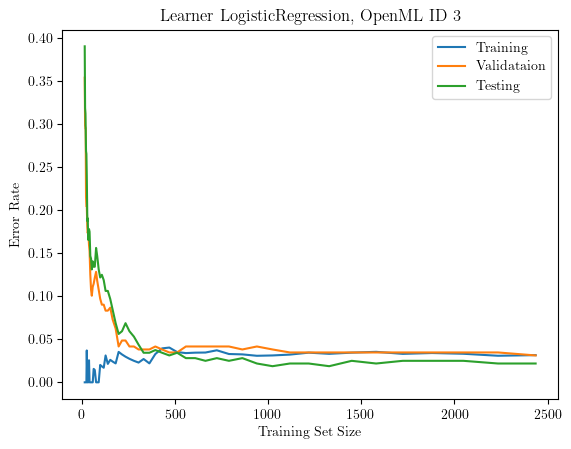

In [5]:
dataset_index, learner_index, outer_split, inner_split, feature_scaling, data_acquisition = 0, 6, 0, 0, 0, 0

plt.figure()
plt.plot(anchor_list, dataset[dataset_index, learner_index, outer_split, inner_split,:, 0, feature_scaling, data_acquisition], label="Training")
plt.plot(anchor_list, dataset[dataset_index, learner_index, outer_split, inner_split,:, 1, feature_scaling, data_acquisition], label="Validataion")
plt.plot(anchor_list, dataset[dataset_index, learner_index, outer_split, inner_split,:, 2, feature_scaling, data_acquisition], label="Testing")
plt.title(f'Learner {learner_zoo[learner_index]}, OpenML ID {dataset_ids[dataset_index]}')
plt.xlabel('Training Set Size')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

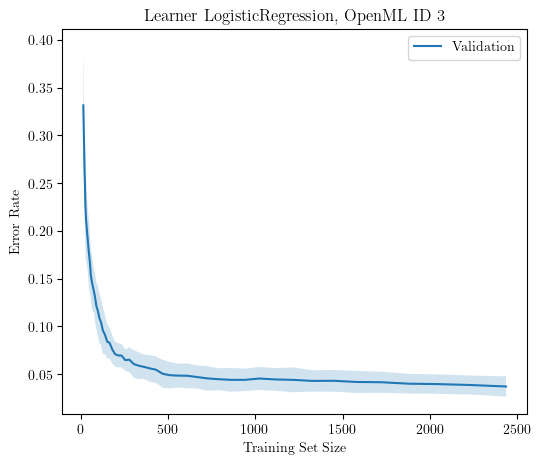

In [6]:
dataset_index, learner_index, train_val_test, feature_scaling, data_acquisition = 0, 6, 1, 0, 0

plt.figure(figsize=(6, 5))
mean_curve = np.nanmean(dataset[dataset_index, learner_index, :, :, :, train_val_test, feature_scaling, data_acquisition], axis=(0, 1))
std_curve = np.nanstd(dataset[dataset_index, learner_index, :, :, :, train_val_test, feature_scaling, data_acquisition], axis=(0, 1))
plt.plot(anchor_list, mean_curve, label='Validation')
plt.fill_between(anchor_list, mean_curve - std_curve, mean_curve + std_curve, alpha=0.2)
plt.title(f'Learner {learner_zoo[learner_index]}, OpenML ID {dataset_ids[dataset_index]}')
plt.xlabel('Training Set Size')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

### Other metrics

Database shape: (265, 24, 5, 5, 137, 3, 3, 2)
(dataset, learner, outer split, inner split, anchor, train-val-test, noFS-mixmaxFS-standardFS, noDataLeakage-DataLeakage)


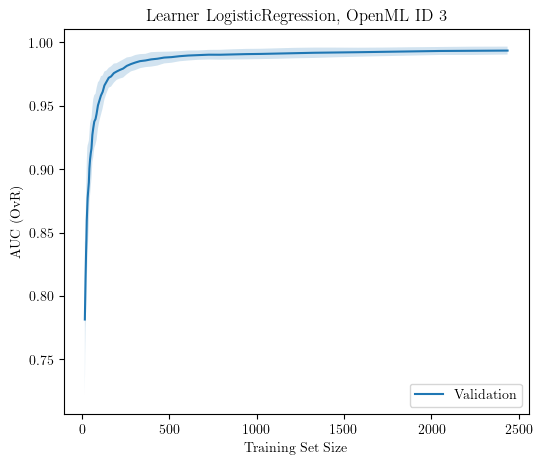

In [7]:
# OpenML dataset ID
dataset_ids = dataset_ids_FULL
# Learner name
learner_zoo = learner_zoo
# anchor
anchor_list = anchor_list_denser

# load the data
with h5py.File(Path.cwd() / 'dataset/LCDB11_AUC_265_24.hdf5', 'r') as f:
    dataset = f['AUC'][...]
print(f'Database shape: {dataset.shape}')
print('(dataset, learner, outer split, inner split, anchor, train-val-test, noFS-mixmaxFS-standardFS, noDataLeakage-DataLeakage)')

dataset_index, learner_index, train_val_test, feature_scaling, data_acquisition = 0, 6, 1, 0, 0

plt.figure(figsize=(6, 5))
mean_curve = np.nanmean(dataset[dataset_index, learner_index, :, :, :, train_val_test, feature_scaling, data_acquisition], axis=(0, 1))
std_curve = np.nanstd(dataset[dataset_index, learner_index, :, :, :, train_val_test, feature_scaling, data_acquisition], axis=(0, 1))
plt.plot(anchor_list, mean_curve, label='Validation')
plt.fill_between(anchor_list, mean_curve - std_curve, mean_curve + std_curve, alpha=0.2)
plt.title(f'Learner {learner_zoo[learner_index]}, OpenML ID {dataset_ids[dataset_index]}')
plt.xlabel('Training Set Size')
plt.ylabel('AUC (OvR)')
plt.legend()
plt.show()

Database shape: (265, 24, 5, 5, 137, 3, 3, 2)
(dataset, learner, outer split, inner split, anchor, train-val-test, noFS-mixmaxFS-standardFS, noDataLeakage-DataLeakage)


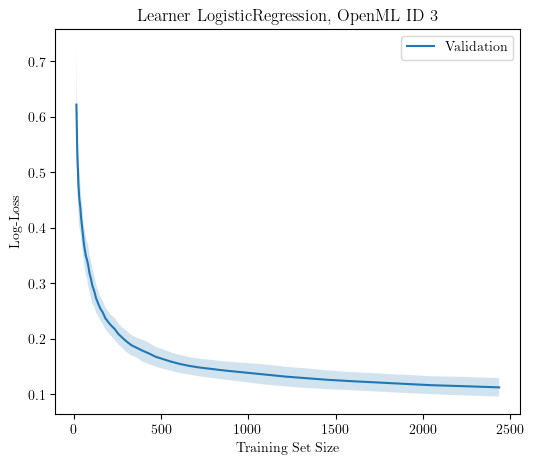

In [8]:
# OpenML dataset ID
dataset_ids = dataset_ids_FULL
# Learner name
learner_zoo = learner_zoo
# anchor
anchor_list = anchor_list_denser

# load the data
with h5py.File(Path.cwd() / 'dataset/LCDB11_log-loss_265_24.hdf5', 'r') as f:
    dataset = f['log-loss'][...]
print(f'Database shape: {dataset.shape}')
print('(dataset, learner, outer split, inner split, anchor, train-val-test, noFS-mixmaxFS-standardFS, noDataLeakage-DataLeakage)')

dataset_index, learner_index, train_val_test, feature_scaling, data_acquisition = 0, 6, 1, 0, 0

plt.figure(figsize=(6, 5))
mean_curve = np.nanmean(dataset[dataset_index, learner_index, :, :, :, train_val_test, feature_scaling, data_acquisition], axis=(0, 1))
std_curve = np.nanstd(dataset[dataset_index, learner_index, :, :, :, train_val_test, feature_scaling, data_acquisition], axis=(0, 1))
plt.plot(anchor_list, mean_curve, label='Validation')
plt.fill_between(anchor_list, mean_curve - std_curve, mean_curve + std_curve, alpha=0.2)
plt.title(f'Learner {learner_zoo[learner_index]}, OpenML ID {dataset_ids[dataset_index]}')
plt.xlabel('Training Set Size')
plt.ylabel('Log-Loss')
plt.legend()
plt.show()

Database shape: (265, 24, 5, 5, 137, 3, 3, 2)
(dataset, learner, outer split, inner split, anchor, train-val-test, noFS-mixmaxFS-standardFS, noDataLeakage-DataLeakage)


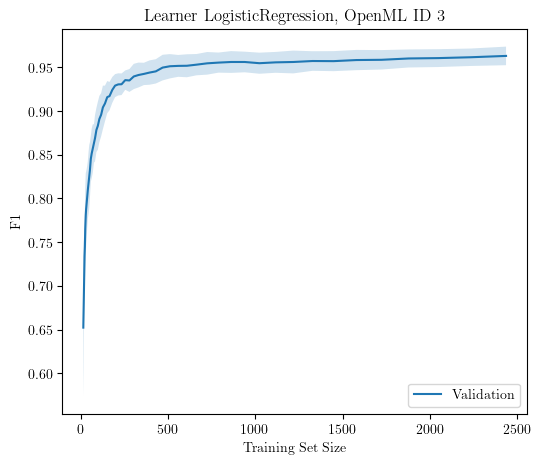

In [9]:
# OpenML dataset ID
dataset_ids = dataset_ids_FULL
# Learner name
learner_zoo = learner_zoo
# anchor
anchor_list = anchor_list_denser

# load the data
with h5py.File(Path.cwd() / 'dataset/LCDB11_f1_265_24.hdf5', 'r') as f:
    dataset = f['f1'][...]
print(f'Database shape: {dataset.shape}')
print('(dataset, learner, outer split, inner split, anchor, train-val-test, noFS-mixmaxFS-standardFS, noDataLeakage-DataLeakage)')

dataset_index, learner_index, train_val_test, feature_scaling, data_acquisition = 0, 6, 1, 0, 0

plt.figure(figsize=(6, 5))
mean_curve = np.nanmean(dataset[dataset_index, learner_index, :, :, :, train_val_test, feature_scaling, data_acquisition], axis=(0, 1))
std_curve = np.nanstd(dataset[dataset_index, learner_index, :, :, :, train_val_test, feature_scaling, data_acquisition], axis=(0, 1))
plt.plot(anchor_list, mean_curve, label='Validation')
plt.fill_between(anchor_list, mean_curve - std_curve, mean_curve + std_curve, alpha=0.2)
plt.title(f'Learner {learner_zoo[learner_index]}, OpenML ID {dataset_ids[dataset_index]}')
plt.xlabel('Training Set Size')
plt.ylabel('F1')
plt.legend()
plt.show()

Database shape: (265, 24, 5, 5, 137, 3, 2)
(dataset, learner, outer split, inner split, anchor, noFS-mixmaxFS-standardFS, noDataLeakage-DataLeakage)


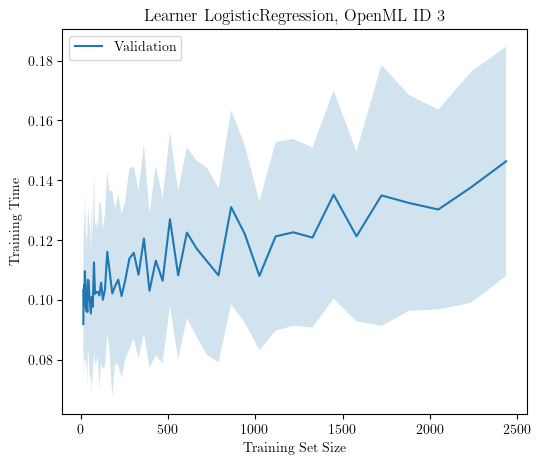

In [10]:
# OpenML dataset ID
dataset_ids = dataset_ids_FULL
# Learner name
learner_zoo = learner_zoo
# anchor
anchor_list = anchor_list_denser

# load the data
with h5py.File(Path.cwd() / 'dataset/LCDB11_traintime_265_24.hdf5', 'r') as f:
    dataset = f['traintime'][...]
print(f'Database shape: {dataset.shape}')
print('(dataset, learner, outer split, inner split, anchor, noFS-mixmaxFS-standardFS, noDataLeakage-DataLeakage)')

dataset_index, learner_index, feature_scaling, data_acquisition = 0, 6, 0, 0

plt.figure(figsize=(6, 5))
mean_curve = np.nanmean(dataset[dataset_index, learner_index, :, :, :, feature_scaling, data_acquisition], axis=(0, 1))
std_curve = np.nanstd(dataset[dataset_index, learner_index, :, :, :, feature_scaling, data_acquisition], axis=(0, 1))
plt.plot(anchor_list, mean_curve, label='Validation')
plt.fill_between(anchor_list, mean_curve - std_curve, mean_curve + std_curve, alpha=0.2)
plt.title(f'Learner {learner_zoo[learner_index]}, OpenML ID {dataset_ids[dataset_index]}')
plt.xlabel('Training Set Size')
plt.ylabel('Training Time')
plt.legend()
plt.show()

### Error Message in Error Rate Learning Curves

In [12]:
# OpenML dataset ID
dataset_ids = dataset_ids_FULL
# Learner name
learner_zoo = learner_zoo
# anchor
anchor_list = anchor_list_denser

status_dic = {0: "ok", 1: "timeout", 2: "error"}

# load the data
with h5py.File(Path.cwd() / 'dataset/LCDB11_msg_265_24.hdf5', 'r') as f:
    status_dataset = f['status'][...]
print(f'Database shape: {status_dataset.shape}')
print('(dataset, learner, outer split, inner split, anchor, noFS-mixmaxFS-standardFS, noDataLeakage-DataLeakage)')
print(f'Dictionary: {status_dic}')

Database shape: (265, 24, 5, 5, 137, 3, 2)
(dataset, learner, outer split, inner split, anchor, noFS-mixmaxFS-standardFS, noDataLeakage-DataLeakage)
Dictionary: {0: 'ok', 1: 'timeout', 2: 'error'}


In [13]:
dataset_index, outer_split, inner_split, anchor_index, feature_scaling, data_acquisition = 1, 0, 0, 0, 0, 0
print("We load the standardization feature scaling version with inner and outer seed as zero. ")
print("check first anchor: ")
status_slice = status_dataset[dataset_index, :, outer_split, inner_split, anchor_index, feature_scaling, data_acquisition]
status_readable = {learner_zoo[i]: status_dic[status] for i, status in enumerate(status_slice)}

for learner, status in status_readable.items():
    print(f"Openml dataset ID: {dataset_ids_FULL[dataset_index]}, learner: {learner}, status: {status}")


We load the standardization feature scaling version with inner and outer seed as zero. 
check first anchor: 
Openml dataset ID: 6, learner: SVM_Linear, status: ok
Openml dataset ID: 6, learner: SVM_Poly, status: ok
Openml dataset ID: 6, learner: SVM_RBF, status: ok
Openml dataset ID: 6, learner: SVM_Sigmoid, status: ok
Openml dataset ID: 6, learner: Decision Tree, status: ok
Openml dataset ID: 6, learner: ExtraTree, status: ok
Openml dataset ID: 6, learner: LogisticRegression, status: ok
Openml dataset ID: 6, learner: PassiveAggressive, status: ok
Openml dataset ID: 6, learner: Perceptron, status: ok
Openml dataset ID: 6, learner: RidgeClassifier, status: ok
Openml dataset ID: 6, learner: SGDClassifier, status: ok
Openml dataset ID: 6, learner: MLP, status: ok
Openml dataset ID: 6, learner: LDA, status: ok
Openml dataset ID: 6, learner: QDA, status: error
Openml dataset ID: 6, learner: BernoulliNB, status: ok
Openml dataset ID: 6, learner: MultinomialNB, status: ok
Openml dataset ID: 6

Then we load error message dataset to check the reason

In [ ]:
learner_index = 13
with h5py.File(Path.cwd() / 'dataset/LCDB11_msg_265_24.hdf5', 'r') as f:
    msg_dataset = f['error message'][dataset_index, learner_index, outer_split, inner_split, anchor_index, feature_scaling, data_acquisition]

print(f'Error message of learner {learner_zoo[learner_index]}: {msg_dataset.decode("utf-8")}')

Error message of learner QDA: y has only 1 sample in class C, covariance is ill defined.


### Easy Logic to Remove NaN in Learning Curves

In [15]:
# OpenML dataset ID
dataset_ids = dataset_ids_CC18
# Learner name
learner_zoo = learner_zoo
# anchor
anchor_list = anchor_list_denser

# load the data
with h5py.File(Path.cwd() / 'dataset/LCDB11_ER_CC18_24.hdf5', 'r') as f:
    dataset = f['error rate'][...]

dataset_index, learner_index, outer_split, inner_split, feature_scaling, data_acquisition = 1, 13, 0, 0, 0, 0
raw_validation_curve = dataset[dataset_index, learner_index, outer_split, inner_split, :, 1, feature_scaling, data_acquisition]

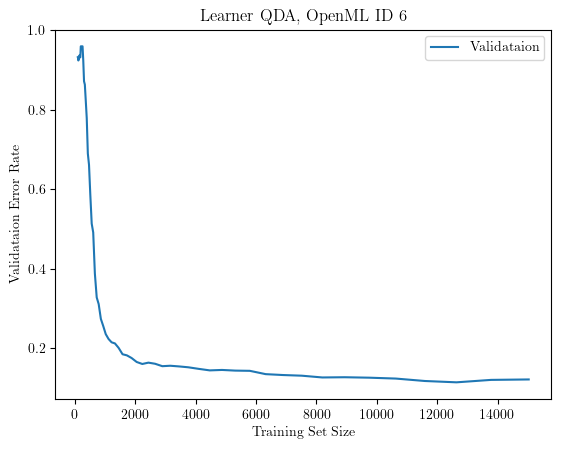

In [16]:
valid_mask = ~np.isnan(raw_validation_curve)
usable_validation_curve = raw_validation_curve[valid_mask]
usable_anchors = anchor_list_denser[valid_mask]

plt.figure()
plt.plot(usable_anchors, usable_validation_curve, label="Validataion")
plt.title(f'Learner {learner_zoo[learner_index]}, OpenML ID {dataset_ids[dataset_index]}')
plt.xlabel('Training Set Size')
plt.ylabel('Validataion Error Rate')
plt.legend()
plt.show()